# Projet Steganographie texte dans une image rbv

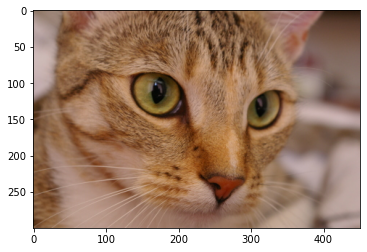

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import skimage

img = skimage.data.chelsea()
plt.imshow(img)
plt.show()

In [36]:
print("Y :", img.shape[0])
print("X :", img.shape[1])
print("Image en couleur donc", img.shape[2],"pixels par pixel")

print("\nNombre de pixels total que l'on peut coder:", img.shape[0]*img.shape[1]*img.shape[2])

Y : 300
X : 451
Image en couleur donc 3 pixels par pixel

Nombre de pixels total que l'on peut coder: 405900


## Etape 1 : Transformer chaque caractère en code ASCII puis binaire

In [37]:
message = "Thalassius vero ea tempestate praefectus praetorio praesens ipse quoque adrogantis ingenii, considerans incitationem eius ad multorum augeri discrimina, non maturitate vel consiliis mitigabat, ut aliquotiens celsae potestates iras principum molliverunt, sed adversando iurgandoque cum parum congrueret, eum ad rabiem potius evibrabat, Augustum actus eius exaggerando creberrime docens, idque, incertum qua mente, ne lateret adfectans. quibus mox Caesar acrius efferatus, velut contumaciae quoddam vexillum altius erigens, sine respectu salutis alienae vel suae ad vertenda opposita instar rapidi fluminis irrevocabili impetu ferebatur.Postremo ad id indignitatis est ventum, ut cum peregrini ob formidatam haut ita dudum alimentorum inopiam pellerentur ab urbe praecipites, sectatoribus disciplinarum liberalium inpendio paucis sine respiratione ulla extrusis, tenerentur minimarum adseclae veri, quique id simularunt ad tempus, et tria milia saltatricum ne interpellata quidem cum choris totidemque remanerent magistris.Horum adventum praedocti speculationibus fidis rectores militum tessera data sollemni armatos omnes celeri eduxere procursu et agiliter praeterito Calycadni fluminis ponte, cuius undarum magnitudo murorum adluit turres, in speciem locavere pugnandi. neque tamen exiluit quisquam nec permissus est congredi. formidabatur enim flagrans vesania manus et superior numero et ruitura sine respectu salutis in ferrum."

In [38]:
def string_to_binaire(message):
    liste_de_binaire = []
    
    # On ajoute un mot-code STOP à la fin du message pour simplifier le décodage
    # Hint : STOP s'écrit en binaire : 01010011, 01010100, 01001111, 01010000
    STOP = ['01010011', '01010100', '01001111', '01010000']
    
    for lettre in message :
        lettre_asci = ord(lettre)
        lettre_binaire = bin(lettre_asci)
        lettre_binaire = lettre_binaire[2:].zfill(8)
        liste_de_binaire.append(lettre_binaire)
        
    return liste_de_binaire + STOP

liste_binaire = string_to_binaire(message)
    
def ligne_binaire(liste):
    ''' 
    ligne binaire est une fonction permettant d'obtenir à partir d'une liste de suite d'octet,
    une seule suite d'octet encodant l'intégralité du message 
    
    liste : le message sous forme de liste de caractères encodé en binaire 
    
    retourne le message écrit sous forme binaire avec des caractères encodés sur 8 bits '''
    chiffres = ""
    for i in liste:
        chiffres += i
        
    return chiffres

message_bin_flat = ligne_binaire(liste_binaire)

On remplace le dernier bit de chaque couleur de chaque pixel par les bits qu'on veut cacher

### A modifier ! Ajouter la clé !

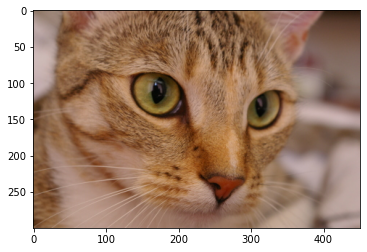

In [62]:
def encoder_image(img, chiffres, lsb, *cle):
    # Tableau de string : va contenir les valeurs de nos bits (rouge,bleu,vert) en binaire
    img_bin = np.chararray((img.shape[0], img.shape[1], img.shape[2]), itemsize=8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                img_bin[i,j,k] = bin(img[i,j,k])[2:].zfill(8) # car le bin renvoie '0b10001111' il faut enlever les deux premiers caractères
    
    # mettre au bon format le tableau de string
    img_bin = img_bin.decode("utf-8")
    
    # On flatten l'image pour itérer plus facilement
    img_bin_flat = img_bin.flatten()
    img_encoded_bin = img_bin_flat.copy()
    #print("img_bin_flat.shape =",img_bin_flat.shape)
    #print("img_bin=",img_bin.shape)
    #print("mult = ",img_bin.shape[0]*img_bin.shape[1]*img_bin.shape[2])
    #print("longueure message", len(chiffres))
    for i in range(len(chiffres)//lsb):
        img_encoded_bin[i] = img_encoded_bin[i][:8-lsb] + chiffres[0:lsb]
        #print("img_encoded_bin[i][:8-lsb]=",img_encoded_bin[i][:8-lsb])
        #print("chiffres[0:lsb] =",chiffres[0:lsb])
        #print("img_encoded_bin[",i,"]=", img_encoded_bin[i])
        chiffres = chiffres[lsb:] #ici problème probable
        #print("chiffres=", len(chiffres))
        #print("-------------------------")
   
    img_encoded_bin = np.reshape(img_encoded_bin, img_bin.shape)
    img_encoded = img.copy()
    
    #print("img_encoded_bin =",img_encoded_bin.shape)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                img_encoded[i,j,k] = int(img_encoded_bin[i,j,k],2)
        
    return img_encoded

img_encoded = encoder_image(img, message_bin_flat, 2)
plt.imshow(img_encoded)
plt.show()

img_encoded_bin[i][:8-lsb]= 100011
chiffres[0:lsb] = 01
img_encoded_bin[ 0 ]= 10001101
chiffres= 11478
-------------------------
img_encoded_bin[i][:8-lsb]= 011110
chiffres[0:lsb] = 01
img_encoded_bin[ 1 ]= 01111001
chiffres= 11476
-------------------------
img_encoded_bin[i][:8-lsb]= 011010
chiffres[0:lsb] = 01
img_encoded_bin[ 2 ]= 01101001
chiffres= 11474
-------------------------
img_encoded_bin[i][:8-lsb]= 100011
chiffres[0:lsb] = 00
img_encoded_bin[ 3 ]= 10001100
chiffres= 11472
-------------------------
img_encoded_bin[i][:8-lsb]= 011110
chiffres[0:lsb] = 01
img_encoded_bin[ 4 ]= 01111001
chiffres= 11470
-------------------------
img_encoded_bin[i][:8-lsb]= 011010
chiffres[0:lsb] = 10
img_encoded_bin[ 5 ]= 01101010
chiffres= 11468
-------------------------
img_encoded_bin[i][:8-lsb]= 100011
chiffres[0:lsb] = 10
img_encoded_bin[ 6 ]= 10001110
chiffres= 11466
-------------------------
img_encoded_bin[i][:8-lsb]= 011101
chiffres[0:lsb] = 00
img_encoded_bin[ 7 ]= 01110100
chiffres= 

img_encoded_bin[i][:8-lsb]= 100111
chiffres[0:lsb] = 10
img_encoded_bin[ 69 ]= 10011110
chiffres= 11340
-------------------------
img_encoded_bin[i][:8-lsb]= 100001
chiffres[0:lsb] = 00
img_encoded_bin[ 70 ]= 10000100
chiffres= 11338
-------------------------
img_encoded_bin[i][:8-lsb]= 011110
chiffres[0:lsb] = 01
img_encoded_bin[ 71 ]= 01111001
chiffres= 11336
-------------------------
img_encoded_bin[i][:8-lsb]= 100111
chiffres[0:lsb] = 00
img_encoded_bin[ 72 ]= 10011100
chiffres= 11334
-------------------------
img_encoded_bin[i][:8-lsb]= 100001
chiffres[0:lsb] = 10
img_encoded_bin[ 73 ]= 10000110
chiffres= 11332
-------------------------
img_encoded_bin[i][:8-lsb]= 011110
chiffres[0:lsb] = 00
img_encoded_bin[ 74 ]= 01111000
chiffres= 11330
-------------------------
img_encoded_bin[i][:8-lsb]= 100111
chiffres[0:lsb] = 00
img_encoded_bin[ 75 ]= 10011100
chiffres= 11328
-------------------------
img_encoded_bin[i][:8-lsb]= 100001
chiffres[0:lsb] = 01
img_encoded_bin[ 76 ]= 10000101
ch

chiffres= 11126
-------------------------
img_encoded_bin[i][:8-lsb]= 100011
chiffres[0:lsb] = 10
img_encoded_bin[ 177 ]= 10001110
chiffres= 11124
-------------------------
img_encoded_bin[i][:8-lsb]= 010110
chiffres[0:lsb] = 01
img_encoded_bin[ 178 ]= 01011001
chiffres= 11122
-------------------------
img_encoded_bin[i][:8-lsb]= 010001
chiffres[0:lsb] = 01
img_encoded_bin[ 179 ]= 01000101
chiffres= 11120
-------------------------
img_encoded_bin[i][:8-lsb]= 100011
chiffres[0:lsb] = 01
img_encoded_bin[ 180 ]= 10001101
chiffres= 11118
-------------------------
img_encoded_bin[i][:8-lsb]= 010111
chiffres[0:lsb] = 11
img_encoded_bin[ 181 ]= 01011111
chiffres= 11116
-------------------------
img_encoded_bin[i][:8-lsb]= 010010
chiffres[0:lsb] = 01
img_encoded_bin[ 182 ]= 01001001
chiffres= 11114
-------------------------
img_encoded_bin[i][:8-lsb]= 100100
chiffres[0:lsb] = 00
img_encoded_bin[ 183 ]= 10010000
chiffres= 11112
-------------------------
img_encoded_bin[i][:8-lsb]= 011000
chiffr

chiffres= 10884
-------------------------
img_encoded_bin[i][:8-lsb]= 100000
chiffres[0:lsb] = 00
img_encoded_bin[ 298 ]= 10000000
chiffres= 10882
-------------------------
img_encoded_bin[i][:8-lsb]= 011101
chiffres[0:lsb] = 10
img_encoded_bin[ 299 ]= 01110110
chiffres= 10880
-------------------------
img_encoded_bin[i][:8-lsb]= 101001
chiffres[0:lsb] = 01
img_encoded_bin[ 300 ]= 10100101
chiffres= 10878
-------------------------
img_encoded_bin[i][:8-lsb]= 100000
chiffres[0:lsb] = 10
img_encoded_bin[ 301 ]= 10000010
chiffres= 10876
-------------------------
img_encoded_bin[i][:8-lsb]= 011100
chiffres[0:lsb] = 11
img_encoded_bin[ 302 ]= 01110011
chiffres= 10874
-------------------------
img_encoded_bin[i][:8-lsb]= 101000
chiffres[0:lsb] = 11
img_encoded_bin[ 303 ]= 10100011
chiffres= 10872
-------------------------
img_encoded_bin[i][:8-lsb]= 011111
chiffres[0:lsb] = 01
img_encoded_bin[ 304 ]= 01111101
chiffres= 10870
-------------------------
img_encoded_bin[i][:8-lsb]= 011011
chiffr

img_encoded_bin[ 421 ]= 10000110
chiffres= 10636
-------------------------
img_encoded_bin[i][:8-lsb]= 011000
chiffres[0:lsb] = 11
img_encoded_bin[ 422 ]= 01100011
chiffres= 10634
-------------------------
img_encoded_bin[i][:8-lsb]= 101001
chiffres[0:lsb] = 10
img_encoded_bin[ 423 ]= 10100110
chiffres= 10632
-------------------------
img_encoded_bin[i][:8-lsb]= 011111
chiffres[0:lsb] = 01
img_encoded_bin[ 424 ]= 01111101
chiffres= 10630
-------------------------
img_encoded_bin[i][:8-lsb]= 010110
chiffres[0:lsb] = 10
img_encoded_bin[ 425 ]= 01011010
chiffres= 10628
-------------------------
img_encoded_bin[i][:8-lsb]= 101011
chiffres[0:lsb] = 00
img_encoded_bin[ 426 ]= 10101100
chiffres= 10626
-------------------------
img_encoded_bin[i][:8-lsb]= 100000
chiffres[0:lsb] = 11
img_encoded_bin[ 427 ]= 10000011
chiffres= 10624
-------------------------
img_encoded_bin[i][:8-lsb]= 011000
chiffres[0:lsb] = 01
img_encoded_bin[ 428 ]= 01100001
chiffres= 10622
-------------------------
img_enco

chiffres= 10390
-------------------------
img_encoded_bin[i][:8-lsb]= 010010
chiffres[0:lsb] = 10
img_encoded_bin[ 545 ]= 01001010
chiffres= 10388
-------------------------
img_encoded_bin[i][:8-lsb]= 011100
chiffres[0:lsb] = 01
img_encoded_bin[ 546 ]= 01110001
chiffres= 10386
-------------------------
img_encoded_bin[i][:8-lsb]= 010011
chiffres[0:lsb] = 11
img_encoded_bin[ 547 ]= 01001111
chiffres= 10384
-------------------------
img_encoded_bin[i][:8-lsb]= 001011
chiffres[0:lsb] = 01
img_encoded_bin[ 548 ]= 00101101
chiffres= 10382
-------------------------
img_encoded_bin[i][:8-lsb]= 100000
chiffres[0:lsb] = 10
img_encoded_bin[ 549 ]= 10000010
chiffres= 10380
-------------------------
img_encoded_bin[i][:8-lsb]= 010111
chiffres[0:lsb] = 01
img_encoded_bin[ 550 ]= 01011101
chiffres= 10378
-------------------------
img_encoded_bin[i][:8-lsb]= 001111
chiffres[0:lsb] = 01
img_encoded_bin[ 551 ]= 00111101
chiffres= 10376
-------------------------
img_encoded_bin[i][:8-lsb]= 100001
chiffr

chiffres= 10260
-------------------------
img_encoded_bin[i][:8-lsb]= 010111
chiffres[0:lsb] = 00
img_encoded_bin[ 610 ]= 01011100
chiffres= 10258
-------------------------
img_encoded_bin[i][:8-lsb]= 010011
chiffres[0:lsb] = 00
img_encoded_bin[ 611 ]= 01001100
chiffres= 10256
-------------------------
img_encoded_bin[i][:8-lsb]= 100000
chiffres[0:lsb] = 01
img_encoded_bin[ 612 ]= 10000001
chiffres= 10254
-------------------------
img_encoded_bin[i][:8-lsb]= 011001
chiffres[0:lsb] = 10
img_encoded_bin[ 613 ]= 01100110
chiffres= 10252
-------------------------
img_encoded_bin[i][:8-lsb]= 010011
chiffres[0:lsb] = 11
img_encoded_bin[ 614 ]= 01001111
chiffres= 10250
-------------------------
img_encoded_bin[i][:8-lsb]= 100101
chiffres[0:lsb] = 10
img_encoded_bin[ 615 ]= 10010110
chiffres= 10248
-------------------------
img_encoded_bin[i][:8-lsb]= 011110
chiffres[0:lsb] = 01
img_encoded_bin[ 616 ]= 01111001
chiffres= 10246
-------------------------
img_encoded_bin[i][:8-lsb]= 010111
chiffr

chiffres= 10110
-------------------------
img_encoded_bin[i][:8-lsb]= 001111
chiffres[0:lsb] = 10
img_encoded_bin[ 685 ]= 00111110
chiffres= 10108
-------------------------
img_encoded_bin[i][:8-lsb]= 001001
chiffres[0:lsb] = 00
img_encoded_bin[ 686 ]= 00100100
chiffres= 10106
-------------------------
img_encoded_bin[i][:8-lsb]= 011110
chiffres[0:lsb] = 00
img_encoded_bin[ 687 ]= 01111000
chiffres= 10104
-------------------------
img_encoded_bin[i][:8-lsb]= 010111
chiffres[0:lsb] = 01
img_encoded_bin[ 688 ]= 01011101
chiffres= 10102
-------------------------
img_encoded_bin[i][:8-lsb]= 010001
chiffres[0:lsb] = 10
img_encoded_bin[ 689 ]= 01000110
chiffres= 10100
-------------------------
img_encoded_bin[i][:8-lsb]= 100110
chiffres[0:lsb] = 00
img_encoded_bin[ 690 ]= 10011000
chiffres= 10098
-------------------------
img_encoded_bin[i][:8-lsb]= 011110
chiffres[0:lsb] = 11
img_encoded_bin[ 691 ]= 01111011
chiffres= 10096
-------------------------
img_encoded_bin[i][:8-lsb]= 010111
chiffr

chiffres= 9970
-------------------------
img_encoded_bin[i][:8-lsb]= 001010
chiffres[0:lsb] = 10
img_encoded_bin[ 755 ]= 00101010
chiffres= 9968
-------------------------
img_encoded_bin[i][:8-lsb]= 011100
chiffres[0:lsb] = 01
img_encoded_bin[ 756 ]= 01110001
chiffres= 9966
-------------------------
img_encoded_bin[i][:8-lsb]= 010100
chiffres[0:lsb] = 10
img_encoded_bin[ 757 ]= 01010010
chiffres= 9964
-------------------------
img_encoded_bin[i][:8-lsb]= 001101
chiffres[0:lsb] = 00
img_encoded_bin[ 758 ]= 00110100
chiffres= 9962
-------------------------
img_encoded_bin[i][:8-lsb]= 011001
chiffres[0:lsb] = 01
img_encoded_bin[ 759 ]= 01100101
chiffres= 9960
-------------------------
img_encoded_bin[i][:8-lsb]= 010001
chiffres[0:lsb] = 01
img_encoded_bin[ 760 ]= 01000101
chiffres= 9958
-------------------------
img_encoded_bin[i][:8-lsb]= 001010
chiffres[0:lsb] = 11
img_encoded_bin[ 761 ]= 00101011
chiffres= 9956
-------------------------
img_encoded_bin[i][:8-lsb]= 010100
chiffres[0:lsb

img_encoded_bin[i][:8-lsb]= 011100
chiffres[0:lsb] = 01
img_encoded_bin[ 832 ]= 01110001
chiffres= 9814
-------------------------
img_encoded_bin[i][:8-lsb]= 010100
chiffres[0:lsb] = 10
img_encoded_bin[ 833 ]= 01010010
chiffres= 9812
-------------------------
img_encoded_bin[i][:8-lsb]= 100111
chiffres[0:lsb] = 00
img_encoded_bin[ 834 ]= 10011100
chiffres= 9810
-------------------------
img_encoded_bin[i][:8-lsb]= 011101
chiffres[0:lsb] = 11
img_encoded_bin[ 835 ]= 01110111
chiffres= 9808
-------------------------
img_encoded_bin[i][:8-lsb]= 010101
chiffres[0:lsb] = 01
img_encoded_bin[ 836 ]= 01010101
chiffres= 9806
-------------------------
img_encoded_bin[i][:8-lsb]= 100110
chiffres[0:lsb] = 10
img_encoded_bin[ 837 ]= 10011010
chiffres= 9804
-------------------------
img_encoded_bin[i][:8-lsb]= 011100
chiffres[0:lsb] = 01
img_encoded_bin[ 838 ]= 01110001
chiffres= 9802
-------------------------
img_encoded_bin[i][:8-lsb]= 010101
chiffres[0:lsb] = 01
img_encoded_bin[ 839 ]= 01010101
c

chiffres[0:lsb] = 00
img_encoded_bin[ 930 ]= 10010100
chiffres= 9618
-------------------------
img_encoded_bin[i][:8-lsb]= 011100
chiffres[0:lsb] = 10
img_encoded_bin[ 931 ]= 01110010
chiffres= 9616
-------------------------
img_encoded_bin[i][:8-lsb]= 010101
chiffres[0:lsb] = 01
img_encoded_bin[ 932 ]= 01010101
chiffres= 9614
-------------------------
img_encoded_bin[i][:8-lsb]= 100100
chiffres[0:lsb] = 10
img_encoded_bin[ 933 ]= 10010010
chiffres= 9612
-------------------------
img_encoded_bin[i][:8-lsb]= 011011
chiffres[0:lsb] = 10
img_encoded_bin[ 934 ]= 01101110
chiffres= 9610
-------------------------
img_encoded_bin[i][:8-lsb]= 010100
chiffres[0:lsb] = 01
img_encoded_bin[ 935 ]= 01010001
chiffres= 9608
-------------------------
img_encoded_bin[i][:8-lsb]= 100110
chiffres[0:lsb] = 01
img_encoded_bin[ 936 ]= 10011001
chiffres= 9606
-------------------------
img_encoded_bin[i][:8-lsb]= 011100
chiffres[0:lsb] = 10
img_encoded_bin[ 937 ]= 01110010
chiffres= 9604
---------------------

chiffres= 9452
-------------------------
img_encoded_bin[i][:8-lsb]= 101011
chiffres[0:lsb] = 00
img_encoded_bin[ 1014 ]= 10101100
chiffres= 9450
-------------------------
img_encoded_bin[i][:8-lsb]= 100011
chiffres[0:lsb] = 00
img_encoded_bin[ 1015 ]= 10001100
chiffres= 9448
-------------------------
img_encoded_bin[i][:8-lsb]= 100000
chiffres[0:lsb] = 01
img_encoded_bin[ 1016 ]= 10000001
chiffres= 9446
-------------------------
img_encoded_bin[i][:8-lsb]= 101011
chiffres[0:lsb] = 11
img_encoded_bin[ 1017 ]= 10101111
chiffres= 9444
-------------------------
img_encoded_bin[i][:8-lsb]= 100010
chiffres[0:lsb] = 00
img_encoded_bin[ 1018 ]= 10001000
chiffres= 9442
-------------------------
img_encoded_bin[i][:8-lsb]= 100000
chiffres[0:lsb] = 11
img_encoded_bin[ 1019 ]= 10000011
chiffres= 9440
-------------------------
img_encoded_bin[i][:8-lsb]= 101011
chiffres[0:lsb] = 01
img_encoded_bin[ 1020 ]= 10101101
chiffres= 9438
-------------------------
img_encoded_bin[i][:8-lsb]= 100010
chiffre

img_encoded_bin[ 1097 ]= 01110110
chiffres= 9284
-------------------------
img_encoded_bin[i][:8-lsb]= 101001
chiffres[0:lsb] = 11
img_encoded_bin[ 1098 ]= 10100111
chiffres= 9282
-------------------------
img_encoded_bin[i][:8-lsb]= 011101
chiffres[0:lsb] = 10
img_encoded_bin[ 1099 ]= 01110110
chiffres= 9280
-------------------------
img_encoded_bin[i][:8-lsb]= 011101
chiffres[0:lsb] = 01
img_encoded_bin[ 1100 ]= 01110101
chiffres= 9278
-------------------------
img_encoded_bin[i][:8-lsb]= 101001
chiffres[0:lsb] = 10
img_encoded_bin[ 1101 ]= 10100110
chiffres= 9276
-------------------------
img_encoded_bin[i][:8-lsb]= 011100
chiffres[0:lsb] = 01
img_encoded_bin[ 1102 ]= 01110001
chiffres= 9274
-------------------------
img_encoded_bin[i][:8-lsb]= 011100
chiffres[0:lsb] = 00
img_encoded_bin[ 1103 ]= 01110000
chiffres= 9272
-------------------------
img_encoded_bin[i][:8-lsb]= 101000
chiffres[0:lsb] = 01
img_encoded_bin[ 1104 ]= 10100001
chiffres= 9270
-------------------------
img_enco

chiffres= 9120
-------------------------
img_encoded_bin[i][:8-lsb]= 011001
chiffres[0:lsb] = 01
img_encoded_bin[ 1180 ]= 01100101
chiffres= 9118
-------------------------
img_encoded_bin[i][:8-lsb]= 011000
chiffres[0:lsb] = 11
img_encoded_bin[ 1181 ]= 01100011
chiffres= 9116
-------------------------
img_encoded_bin[i][:8-lsb]= 100110
chiffres[0:lsb] = 00
img_encoded_bin[ 1182 ]= 10011000
chiffres= 9114
-------------------------
img_encoded_bin[i][:8-lsb]= 011010
chiffres[0:lsb] = 10
img_encoded_bin[ 1183 ]= 01101010
chiffres= 9112
-------------------------
img_encoded_bin[i][:8-lsb]= 011001
chiffres[0:lsb] = 01
img_encoded_bin[ 1184 ]= 01100101
chiffres= 9110
-------------------------
img_encoded_bin[i][:8-lsb]= 100111
chiffres[0:lsb] = 11
img_encoded_bin[ 1185 ]= 10011111
chiffres= 9108
-------------------------
img_encoded_bin[i][:8-lsb]= 011010
chiffres[0:lsb] = 01
img_encoded_bin[ 1186 ]= 01101001
chiffres= 9106
-------------------------
img_encoded_bin[i][:8-lsb]= 011001
chiffre

img_encoded_bin[ 1273 ]= 00011110
chiffres= 8932
-------------------------
img_encoded_bin[i][:8-lsb]= 000011
chiffres[0:lsb] = 11
img_encoded_bin[ 1274 ]= 00001111
chiffres= 8930
-------------------------
img_encoded_bin[i][:8-lsb]= 001100
chiffres[0:lsb] = 11
img_encoded_bin[ 1275 ]= 00110011
chiffres= 8928
-------------------------
img_encoded_bin[i][:8-lsb]= 000111
chiffres[0:lsb] = 01
img_encoded_bin[ 1276 ]= 00011101
chiffres= 8926
-------------------------
img_encoded_bin[i][:8-lsb]= 000011
chiffres[0:lsb] = 11
img_encoded_bin[ 1277 ]= 00001111
chiffres= 8924
-------------------------
img_encoded_bin[i][:8-lsb]= 001100
chiffres[0:lsb] = 01
img_encoded_bin[ 1278 ]= 00110001
chiffres= 8922
-------------------------
img_encoded_bin[i][:8-lsb]= 000111
chiffres[0:lsb] = 00
img_encoded_bin[ 1279 ]= 00011100
chiffres= 8920
-------------------------
img_encoded_bin[i][:8-lsb]= 000011
chiffres[0:lsb] = 01
img_encoded_bin[ 1280 ]= 00001101
chiffres= 8918
-------------------------
img_enco

img_encoded_bin[ 1364 ]= 01100101
chiffres= 8750
-------------------------
img_encoded_bin[i][:8-lsb]= 100011
chiffres[0:lsb] = 11
img_encoded_bin[ 1365 ]= 10001111
chiffres= 8748
-------------------------
img_encoded_bin[i][:8-lsb]= 011101
chiffres[0:lsb] = 01
img_encoded_bin[ 1366 ]= 01110101
chiffres= 8746
-------------------------
img_encoded_bin[i][:8-lsb]= 011001
chiffres[0:lsb] = 01
img_encoded_bin[ 1367 ]= 01100101
chiffres= 8744
-------------------------
img_encoded_bin[i][:8-lsb]= 100011
chiffres[0:lsb] = 01
img_encoded_bin[ 1368 ]= 10001101
chiffres= 8742
-------------------------
img_encoded_bin[i][:8-lsb]= 011101
chiffres[0:lsb] = 10
img_encoded_bin[ 1369 ]= 01110110
chiffres= 8740
-------------------------
img_encoded_bin[i][:8-lsb]= 011001
chiffres[0:lsb] = 11
img_encoded_bin[ 1370 ]= 01100111
chiffres= 8738
-------------------------
img_encoded_bin[i][:8-lsb]= 100011
chiffres[0:lsb] = 01
img_encoded_bin[ 1371 ]= 10001101
chiffres= 8736
-------------------------
img_enco

chiffres[0:lsb] = 10
img_encoded_bin[ 1437 ]= 10100010
chiffres= 8604
-------------------------
img_encoded_bin[i][:8-lsb]= 100010
chiffres[0:lsb] = 01
img_encoded_bin[ 1438 ]= 10001001
chiffres= 8602
-------------------------
img_encoded_bin[i][:8-lsb]= 011110
chiffres[0:lsb] = 11
img_encoded_bin[ 1439 ]= 01111011
chiffres= 8600
-------------------------
img_encoded_bin[i][:8-lsb]= 101000
chiffres[0:lsb] = 01
img_encoded_bin[ 1440 ]= 10100001
chiffres= 8598
-------------------------
img_encoded_bin[i][:8-lsb]= 100010
chiffres[0:lsb] = 10
img_encoded_bin[ 1441 ]= 10001010
chiffres= 8596
-------------------------
img_encoded_bin[i][:8-lsb]= 011110
chiffres[0:lsb] = 01
img_encoded_bin[ 1442 ]= 01111001
chiffres= 8594
-------------------------
img_encoded_bin[i][:8-lsb]= 101000
chiffres[0:lsb] = 01
img_encoded_bin[ 1443 ]= 10100001
chiffres= 8592
-------------------------
img_encoded_bin[i][:8-lsb]= 100010
chiffres[0:lsb] = 01
img_encoded_bin[ 1444 ]= 10001001
chiffres= 8590
-------------

-------------------------
img_encoded_bin[i][:8-lsb]= 100111
chiffres[0:lsb] = 01
img_encoded_bin[ 1500 ]= 10011101
chiffres= 8478
-------------------------
img_encoded_bin[i][:8-lsb]= 011100
chiffres[0:lsb] = 10
img_encoded_bin[ 1501 ]= 01110010
chiffres= 8476
-------------------------
img_encoded_bin[i][:8-lsb]= 010101
chiffres[0:lsb] = 11
img_encoded_bin[ 1502 ]= 01010111
chiffres= 8474
-------------------------
img_encoded_bin[i][:8-lsb]= 100111
chiffres[0:lsb] = 01
img_encoded_bin[ 1503 ]= 10011101
chiffres= 8472
-------------------------
img_encoded_bin[i][:8-lsb]= 011011
chiffres[0:lsb] = 01
img_encoded_bin[ 1504 ]= 01101101
chiffres= 8470
-------------------------
img_encoded_bin[i][:8-lsb]= 010100
chiffres[0:lsb] = 10
img_encoded_bin[ 1505 ]= 01010010
chiffres= 8468
-------------------------
img_encoded_bin[i][:8-lsb]= 100110
chiffres[0:lsb] = 01
img_encoded_bin[ 1506 ]= 10011001
chiffres= 8466
-------------------------
img_encoded_bin[i][:8-lsb]= 011010
chiffres[0:lsb] = 01
i

img_encoded_bin[i][:8-lsb]= 011101
chiffres[0:lsb] = 01
img_encoded_bin[ 1603 ]= 01110101
chiffres= 8272
-------------------------
img_encoded_bin[i][:8-lsb]= 011010
chiffres[0:lsb] = 00
img_encoded_bin[ 1604 ]= 01101000
chiffres= 8270
-------------------------
img_encoded_bin[i][:8-lsb]= 101000
chiffres[0:lsb] = 10
img_encoded_bin[ 1605 ]= 10100010
chiffres= 8268
-------------------------
img_encoded_bin[i][:8-lsb]= 011111
chiffres[0:lsb] = 00
img_encoded_bin[ 1606 ]= 01111100
chiffres= 8266
-------------------------
img_encoded_bin[i][:8-lsb]= 011011
chiffres[0:lsb] = 00
img_encoded_bin[ 1607 ]= 01101100
chiffres= 8264
-------------------------
img_encoded_bin[i][:8-lsb]= 101001
chiffres[0:lsb] = 01
img_encoded_bin[ 1608 ]= 10100101
chiffres= 8262
-------------------------
img_encoded_bin[i][:8-lsb]= 100000
chiffres[0:lsb] = 11
img_encoded_bin[ 1609 ]= 10000011
chiffres= 8260
-------------------------
img_encoded_bin[i][:8-lsb]= 011101
chiffres[0:lsb] = 00
img_encoded_bin[ 1610 ]= 01

-------------------------
img_encoded_bin[i][:8-lsb]= 100000
chiffres[0:lsb] = 11
img_encoded_bin[ 1726 ]= 10000011
chiffres= 8026
-------------------------
img_encoded_bin[i][:8-lsb]= 011010
chiffres[0:lsb] = 10
img_encoded_bin[ 1727 ]= 01101010
chiffres= 8024
-------------------------
img_encoded_bin[i][:8-lsb]= 101011
chiffres[0:lsb] = 01
img_encoded_bin[ 1728 ]= 10101101
chiffres= 8022
-------------------------
img_encoded_bin[i][:8-lsb]= 100000
chiffres[0:lsb] = 11
img_encoded_bin[ 1729 ]= 10000011
chiffres= 8020
-------------------------
img_encoded_bin[i][:8-lsb]= 011011
chiffres[0:lsb] = 00
img_encoded_bin[ 1730 ]= 01101100
chiffres= 8018
-------------------------
img_encoded_bin[i][:8-lsb]= 101011
chiffres[0:lsb] = 11
img_encoded_bin[ 1731 ]= 10101111
chiffres= 8016
-------------------------
img_encoded_bin[i][:8-lsb]= 100001
chiffres[0:lsb] = 00
img_encoded_bin[ 1732 ]= 10000100
chiffres= 8014
-------------------------
img_encoded_bin[i][:8-lsb]= 011010
chiffres[0:lsb] = 10
i

chiffres[0:lsb] = 10
img_encoded_bin[ 1826 ]= 00110010
chiffres= 7826
-------------------------
img_encoded_bin[i][:8-lsb]= 011010
chiffres[0:lsb] = 01
img_encoded_bin[ 1827 ]= 01101001
chiffres= 7824
-------------------------
img_encoded_bin[i][:8-lsb]= 010000
chiffres[0:lsb] = 01
img_encoded_bin[ 1828 ]= 01000001
chiffres= 7822
-------------------------
img_encoded_bin[i][:8-lsb]= 001010
chiffres[0:lsb] = 11
img_encoded_bin[ 1829 ]= 00101011
chiffres= 7820
-------------------------
img_encoded_bin[i][:8-lsb]= 011010
chiffres[0:lsb] = 01
img_encoded_bin[ 1830 ]= 01101001
chiffres= 7818
-------------------------
img_encoded_bin[i][:8-lsb]= 010000
chiffres[0:lsb] = 01
img_encoded_bin[ 1831 ]= 01000001
chiffres= 7816
-------------------------
img_encoded_bin[i][:8-lsb]= 001010
chiffres[0:lsb] = 01
img_encoded_bin[ 1832 ]= 00101001
chiffres= 7814
-------------------------
img_encoded_bin[i][:8-lsb]= 011110
chiffres[0:lsb] = 11
img_encoded_bin[ 1833 ]= 01111011
chiffres= 7812
-------------

-------------------------
img_encoded_bin[i][:8-lsb]= 011100
chiffres[0:lsb] = 01
img_encoded_bin[ 1932 ]= 01110001
chiffres= 7614
-------------------------
img_encoded_bin[i][:8-lsb]= 010011
chiffres[0:lsb] = 10
img_encoded_bin[ 1933 ]= 01001110
chiffres= 7612
-------------------------
img_encoded_bin[i][:8-lsb]= 001100
chiffres[0:lsb] = 00
img_encoded_bin[ 1934 ]= 00110000
chiffres= 7610
-------------------------
img_encoded_bin[i][:8-lsb]= 100000
chiffres[0:lsb] = 01
img_encoded_bin[ 1935 ]= 10000001
chiffres= 7608
-------------------------
img_encoded_bin[i][:8-lsb]= 010111
chiffres[0:lsb] = 01
img_encoded_bin[ 1936 ]= 01011101
chiffres= 7606
-------------------------
img_encoded_bin[i][:8-lsb]= 001111
chiffres[0:lsb] = 10
img_encoded_bin[ 1937 ]= 00111110
chiffres= 7604
-------------------------
img_encoded_bin[i][:8-lsb]= 100100
chiffres[0:lsb] = 00
img_encoded_bin[ 1938 ]= 10010000
chiffres= 7602
-------------------------
img_encoded_bin[i][:8-lsb]= 011010
chiffres[0:lsb] = 11
i

chiffres= 7468
-------------------------
img_encoded_bin[i][:8-lsb]= 011010
chiffres[0:lsb] = 11
img_encoded_bin[ 2006 ]= 01101011
chiffres= 7466
-------------------------
img_encoded_bin[i][:8-lsb]= 101000
chiffres[0:lsb] = 00
img_encoded_bin[ 2007 ]= 10100000
chiffres= 7464
-------------------------
img_encoded_bin[i][:8-lsb]= 011110
chiffres[0:lsb] = 01
img_encoded_bin[ 2008 ]= 01111001
chiffres= 7462
-------------------------
img_encoded_bin[i][:8-lsb]= 011000
chiffres[0:lsb] = 10
img_encoded_bin[ 2009 ]= 01100010
chiffres= 7460
-------------------------
img_encoded_bin[i][:8-lsb]= 100100
chiffres[0:lsb] = 11
img_encoded_bin[ 2010 ]= 10010011
chiffres= 7458
-------------------------
img_encoded_bin[i][:8-lsb]= 011001
chiffres[0:lsb] = 00
img_encoded_bin[ 2011 ]= 01100100
chiffres= 7456
-------------------------
img_encoded_bin[i][:8-lsb]= 010011
chiffres[0:lsb] = 01
img_encoded_bin[ 2012 ]= 01001101
chiffres= 7454
-------------------------
img_encoded_bin[i][:8-lsb]= 011111
chiffre

img_encoded_bin[i][:8-lsb]= 001111
chiffres[0:lsb] = 01
img_encoded_bin[ 2116 ]= 00111101
chiffres= 7246
-------------------------
img_encoded_bin[i][:8-lsb]= 001011
chiffres[0:lsb] = 11
img_encoded_bin[ 2117 ]= 00101111
chiffres= 7244
-------------------------
img_encoded_bin[i][:8-lsb]= 010101
chiffres[0:lsb] = 00
img_encoded_bin[ 2118 ]= 01010100
chiffres= 7242
-------------------------
img_encoded_bin[i][:8-lsb]= 001100
chiffres[0:lsb] = 11
img_encoded_bin[ 2119 ]= 00110011
chiffres= 7240
-------------------------
img_encoded_bin[i][:8-lsb]= 001001
chiffres[0:lsb] = 01
img_encoded_bin[ 2120 ]= 00100101
chiffres= 7238
-------------------------
img_encoded_bin[i][:8-lsb]= 010101
chiffres[0:lsb] = 11
img_encoded_bin[ 2121 ]= 01010111
chiffres= 7236
-------------------------
img_encoded_bin[i][:8-lsb]= 001101
chiffres[0:lsb] = 00
img_encoded_bin[ 2122 ]= 00110100
chiffres= 7234
-------------------------
img_encoded_bin[i][:8-lsb]= 001001
chiffres[0:lsb] = 00
img_encoded_bin[ 2123 ]= 00

img_encoded_bin[ 2254 ]= 01110100
chiffres= 6970
-------------------------
img_encoded_bin[i][:8-lsb]= 010011
chiffres[0:lsb] = 00
img_encoded_bin[ 2255 ]= 01001100
chiffres= 6968
-------------------------
img_encoded_bin[i][:8-lsb]= 101000
chiffres[0:lsb] = 01
img_encoded_bin[ 2256 ]= 10100001
chiffres= 6966
-------------------------
img_encoded_bin[i][:8-lsb]= 011110
chiffres[0:lsb] = 11
img_encoded_bin[ 2257 ]= 01111011
chiffres= 6964
-------------------------
img_encoded_bin[i][:8-lsb]= 010100
chiffres[0:lsb] = 01
img_encoded_bin[ 2258 ]= 01010001
chiffres= 6962
-------------------------
img_encoded_bin[i][:8-lsb]= 101000
chiffres[0:lsb] = 10
img_encoded_bin[ 2259 ]= 10100010
chiffres= 6960
-------------------------
img_encoded_bin[i][:8-lsb]= 011110
chiffres[0:lsb] = 01
img_encoded_bin[ 2260 ]= 01111001
chiffres= 6958
-------------------------
img_encoded_bin[i][:8-lsb]= 010101
chiffres[0:lsb] = 10
img_encoded_bin[ 2261 ]= 01010110
chiffres= 6956
-------------------------
img_enco

-------------------------
img_encoded_bin[i][:8-lsb]= 101000
chiffres[0:lsb] = 11
img_encoded_bin[ 2334 ]= 10100011
chiffres= 6810
-------------------------
img_encoded_bin[i][:8-lsb]= 011111
chiffres[0:lsb] = 10
img_encoded_bin[ 2335 ]= 01111110
chiffres= 6808
-------------------------
img_encoded_bin[i][:8-lsb]= 011100
chiffres[0:lsb] = 01
img_encoded_bin[ 2336 ]= 01110001
chiffres= 6806
-------------------------
img_encoded_bin[i][:8-lsb]= 101000
chiffres[0:lsb] = 11
img_encoded_bin[ 2337 ]= 10100011
chiffres= 6804
-------------------------
img_encoded_bin[i][:8-lsb]= 011111
chiffres[0:lsb] = 00
img_encoded_bin[ 2338 ]= 01111100
chiffres= 6802
-------------------------
img_encoded_bin[i][:8-lsb]= 011100
chiffres[0:lsb] = 11
img_encoded_bin[ 2339 ]= 01110011
chiffres= 6800
-------------------------
img_encoded_bin[i][:8-lsb]= 101000
chiffres[0:lsb] = 01
img_encoded_bin[ 2340 ]= 10100001
chiffres= 6798
-------------------------
img_encoded_bin[i][:8-lsb]= 011111
chiffres[0:lsb] = 11
i

img_encoded_bin[ 2410 ]= 01111010
chiffres= 6658
-------------------------
img_encoded_bin[i][:8-lsb]= 011101
chiffres[0:lsb] = 01
img_encoded_bin[ 2411 ]= 01110101
chiffres= 6656
-------------------------
img_encoded_bin[i][:8-lsb]= 101000
chiffres[0:lsb] = 01
img_encoded_bin[ 2412 ]= 10100001
chiffres= 6654
-------------------------
img_encoded_bin[i][:8-lsb]= 011110
chiffres[0:lsb] = 11
img_encoded_bin[ 2413 ]= 01111011
chiffres= 6652
-------------------------
img_encoded_bin[i][:8-lsb]= 011100
chiffres[0:lsb] = 00
img_encoded_bin[ 2414 ]= 01110000
chiffres= 6650
-------------------------
img_encoded_bin[i][:8-lsb]= 101000
chiffres[0:lsb] = 11
img_encoded_bin[ 2415 ]= 10100011
chiffres= 6648
-------------------------
img_encoded_bin[i][:8-lsb]= 011110
chiffres[0:lsb] = 00
img_encoded_bin[ 2416 ]= 01111000
chiffres= 6646
-------------------------
img_encoded_bin[i][:8-lsb]= 011100
chiffres[0:lsb] = 10
img_encoded_bin[ 2417 ]= 01110010
chiffres= 6644
-------------------------
img_enco

img_encoded_bin[ 2492 ]= 01101101
chiffres= 6494
-------------------------
img_encoded_bin[i][:8-lsb]= 100111
chiffres[0:lsb] = 11
img_encoded_bin[ 2493 ]= 10011111
chiffres= 6492
-------------------------
img_encoded_bin[i][:8-lsb]= 011011
chiffres[0:lsb] = 01
img_encoded_bin[ 2494 ]= 01101101
chiffres= 6490
-------------------------
img_encoded_bin[i][:8-lsb]= 011010
chiffres[0:lsb] = 01
img_encoded_bin[ 2495 ]= 01101001
chiffres= 6488
-------------------------
img_encoded_bin[i][:8-lsb]= 100111
chiffres[0:lsb] = 00
img_encoded_bin[ 2496 ]= 10011100
chiffres= 6486
-------------------------
img_encoded_bin[i][:8-lsb]= 011010
chiffres[0:lsb] = 10
img_encoded_bin[ 2497 ]= 01101010
chiffres= 6484
-------------------------
img_encoded_bin[i][:8-lsb]= 011010
chiffres[0:lsb] = 00
img_encoded_bin[ 2498 ]= 01101000
chiffres= 6482
-------------------------
img_encoded_bin[i][:8-lsb]= 100111
chiffres[0:lsb] = 00
img_encoded_bin[ 2499 ]= 10011100
chiffres= 6480
-------------------------
img_enco

img_encoded_bin[ 2572 ]= 00011100
chiffres= 6334
-------------------------
img_encoded_bin[i][:8-lsb]= 000100
chiffres[0:lsb] = 10
img_encoded_bin[ 2573 ]= 00010010
chiffres= 6332
-------------------------
img_encoded_bin[i][:8-lsb]= 001101
chiffres[0:lsb] = 00
img_encoded_bin[ 2574 ]= 00110100
chiffres= 6330
-------------------------
img_encoded_bin[i][:8-lsb]= 000111
chiffres[0:lsb] = 00
img_encoded_bin[ 2575 ]= 00011100
chiffres= 6328
-------------------------
img_encoded_bin[i][:8-lsb]= 000100
chiffres[0:lsb] = 01
img_encoded_bin[ 2576 ]= 00010001
chiffres= 6326
-------------------------
img_encoded_bin[i][:8-lsb]= 001101
chiffres[0:lsb] = 10
img_encoded_bin[ 2577 ]= 00110110
chiffres= 6324
-------------------------
img_encoded_bin[i][:8-lsb]= 000111
chiffres[0:lsb] = 00
img_encoded_bin[ 2578 ]= 00011100
chiffres= 6322
-------------------------
img_encoded_bin[i][:8-lsb]= 000100
chiffres[0:lsb] = 01
img_encoded_bin[ 2579 ]= 00010001
chiffres= 6320
-------------------------
img_enco

img_encoded_bin[i][:8-lsb]= 001011
chiffres[0:lsb] = 11
img_encoded_bin[ 2685 ]= 00101111
chiffres= 6108
-------------------------
img_encoded_bin[i][:8-lsb]= 000110
chiffres[0:lsb] = 01
img_encoded_bin[ 2686 ]= 00011001
chiffres= 6106
-------------------------
img_encoded_bin[i][:8-lsb]= 000100
chiffres[0:lsb] = 01
img_encoded_bin[ 2687 ]= 00010001
chiffres= 6104
-------------------------
img_encoded_bin[i][:8-lsb]= 001011
chiffres[0:lsb] = 01
img_encoded_bin[ 2688 ]= 00101101
chiffres= 6102
-------------------------
img_encoded_bin[i][:8-lsb]= 000110
chiffres[0:lsb] = 10
img_encoded_bin[ 2689 ]= 00011010
chiffres= 6100
-------------------------
img_encoded_bin[i][:8-lsb]= 000100
chiffres[0:lsb] = 11
img_encoded_bin[ 2690 ]= 00010011
chiffres= 6098
-------------------------
img_encoded_bin[i][:8-lsb]= 001100
chiffres[0:lsb] = 01
img_encoded_bin[ 2691 ]= 00110001
chiffres= 6096
-------------------------
img_encoded_bin[i][:8-lsb]= 000111
chiffres[0:lsb] = 00
img_encoded_bin[ 2692 ]= 00

img_encoded_bin[i][:8-lsb]= 100111
chiffres[0:lsb] = 01
img_encoded_bin[ 2772 ]= 10011101
chiffres= 5934
-------------------------
img_encoded_bin[i][:8-lsb]= 100001
chiffres[0:lsb] = 10
img_encoded_bin[ 2773 ]= 10000110
chiffres= 5932
-------------------------
img_encoded_bin[i][:8-lsb]= 011110
chiffres[0:lsb] = 00
img_encoded_bin[ 2774 ]= 01111000
chiffres= 5930
-------------------------
img_encoded_bin[i][:8-lsb]= 100110
chiffres[0:lsb] = 10
img_encoded_bin[ 2775 ]= 10011010
chiffres= 5928
-------------------------
img_encoded_bin[i][:8-lsb]= 100001
chiffres[0:lsb] = 00
img_encoded_bin[ 2776 ]= 10000100
chiffres= 5926
-------------------------
img_encoded_bin[i][:8-lsb]= 011101
chiffres[0:lsb] = 10
img_encoded_bin[ 2777 ]= 01110110
chiffres= 5924
-------------------------
img_encoded_bin[i][:8-lsb]= 100111
chiffres[0:lsb] = 00
img_encoded_bin[ 2778 ]= 10011100
chiffres= 5922
-------------------------
img_encoded_bin[i][:8-lsb]= 100001
chiffres[0:lsb] = 00
img_encoded_bin[ 2779 ]= 10

chiffres= 5736
-------------------------
img_encoded_bin[i][:8-lsb]= 011001
chiffres[0:lsb] = 01
img_encoded_bin[ 2872 ]= 01100101
chiffres= 5734
-------------------------
img_encoded_bin[i][:8-lsb]= 010100
chiffres[0:lsb] = 11
img_encoded_bin[ 2873 ]= 01010011
chiffres= 5732
-------------------------
img_encoded_bin[i][:8-lsb]= 100101
chiffres[0:lsb] = 01
img_encoded_bin[ 2874 ]= 10010101
chiffres= 5730
-------------------------
img_encoded_bin[i][:8-lsb]= 011000
chiffres[0:lsb] = 01
img_encoded_bin[ 2875 ]= 01100001
chiffres= 5728
-------------------------
img_encoded_bin[i][:8-lsb]= 010010
chiffres[0:lsb] = 01
img_encoded_bin[ 2876 ]= 01001001
chiffres= 5726
-------------------------
img_encoded_bin[i][:8-lsb]= 100110
chiffres[0:lsb] = 10
img_encoded_bin[ 2877 ]= 10011010
chiffres= 5724
-------------------------
img_encoded_bin[i][:8-lsb]= 011000
chiffres[0:lsb] = 11
img_encoded_bin[ 2878 ]= 01100011
chiffres= 5722
-------------------------
img_encoded_bin[i][:8-lsb]= 010011
chiffre

chiffres= 5546
-------------------------
img_encoded_bin[i][:8-lsb]= 101101
chiffres[0:lsb] = 00
img_encoded_bin[ 2967 ]= 10110100
chiffres= 5544
-------------------------
img_encoded_bin[i][:8-lsb]= 100011
chiffres[0:lsb] = 01
img_encoded_bin[ 2968 ]= 10001101
chiffres= 5542
-------------------------
img_encoded_bin[i][:8-lsb]= 100000
chiffres[0:lsb] = 10
img_encoded_bin[ 2969 ]= 10000010
chiffres= 5540
-------------------------
img_encoded_bin[i][:8-lsb]= 101101
chiffres[0:lsb] = 01
img_encoded_bin[ 2970 ]= 10110101
chiffres= 5538
-------------------------
img_encoded_bin[i][:8-lsb]= 100100
chiffres[0:lsb] = 01
img_encoded_bin[ 2971 ]= 10010001
chiffres= 5536
-------------------------
img_encoded_bin[i][:8-lsb]= 100000
chiffres[0:lsb] = 01
img_encoded_bin[ 2972 ]= 10000001
chiffres= 5534
-------------------------
img_encoded_bin[i][:8-lsb]= 101101
chiffres[0:lsb] = 10
img_encoded_bin[ 2973 ]= 10110110
chiffres= 5532
-------------------------
img_encoded_bin[i][:8-lsb]= 100100
chiffre

img_encoded_bin[ 3049 ]= 10000111
chiffres= 5380
-------------------------
img_encoded_bin[i][:8-lsb]= 011101
chiffres[0:lsb] = 00
img_encoded_bin[ 3050 ]= 01110100
chiffres= 5378
-------------------------
img_encoded_bin[i][:8-lsb]= 101011
chiffres[0:lsb] = 10
img_encoded_bin[ 3051 ]= 10101110
chiffres= 5376
-------------------------
img_encoded_bin[i][:8-lsb]= 100000
chiffres[0:lsb] = 01
img_encoded_bin[ 3052 ]= 10000001
chiffres= 5374
-------------------------
img_encoded_bin[i][:8-lsb]= 011011
chiffres[0:lsb] = 10
img_encoded_bin[ 3053 ]= 01101110
chiffres= 5372
-------------------------
img_encoded_bin[i][:8-lsb]= 101010
chiffres[0:lsb] = 00
img_encoded_bin[ 3054 ]= 10101000
chiffres= 5370
-------------------------
img_encoded_bin[i][:8-lsb]= 011111
chiffres[0:lsb] = 01
img_encoded_bin[ 3055 ]= 01111101
chiffres= 5368
-------------------------
img_encoded_bin[i][:8-lsb]= 011010
chiffres[0:lsb] = 01
img_encoded_bin[ 3056 ]= 01101001
chiffres= 5366
-------------------------
img_enco

chiffres[0:lsb] = 10
img_encoded_bin[ 3153 ]= 10001010
chiffres= 5172
-------------------------
img_encoded_bin[i][:8-lsb]= 011001
chiffres[0:lsb] = 10
img_encoded_bin[ 3154 ]= 01100110
chiffres= 5170
-------------------------
img_encoded_bin[i][:8-lsb]= 010001
chiffres[0:lsb] = 01
img_encoded_bin[ 3155 ]= 01000101
chiffres= 5168
-------------------------
img_encoded_bin[i][:8-lsb]= 100001
chiffres[0:lsb] = 01
img_encoded_bin[ 3156 ]= 10000101
chiffres= 5166
-------------------------
img_encoded_bin[i][:8-lsb]= 010111
chiffres[0:lsb] = 11
img_encoded_bin[ 3157 ]= 01011111
chiffres= 5164
-------------------------
img_encoded_bin[i][:8-lsb]= 010001
chiffres[0:lsb] = 00
img_encoded_bin[ 3158 ]= 01000100
chiffres= 5162
-------------------------
img_encoded_bin[i][:8-lsb]= 100010
chiffres[0:lsb] = 11
img_encoded_bin[ 3159 ]= 10001011
chiffres= 5160
-------------------------
img_encoded_bin[i][:8-lsb]= 011000
chiffres[0:lsb] = 01
img_encoded_bin[ 3160 ]= 01100001
chiffres= 5158
-------------

-------------------------
img_encoded_bin[i][:8-lsb]= 010001
chiffres[0:lsb] = 01
img_encoded_bin[ 3236 ]= 01000101
chiffres= 5006
-------------------------
img_encoded_bin[i][:8-lsb]= 011110
chiffres[0:lsb] = 11
img_encoded_bin[ 3237 ]= 01111011
chiffres= 5004
-------------------------
img_encoded_bin[i][:8-lsb]= 010011
chiffres[0:lsb] = 01
img_encoded_bin[ 3238 ]= 01001101
chiffres= 5002
-------------------------
img_encoded_bin[i][:8-lsb]= 001100
chiffres[0:lsb] = 01
img_encoded_bin[ 3239 ]= 00110001
chiffres= 5000
-------------------------
img_encoded_bin[i][:8-lsb]= 010110
chiffres[0:lsb] = 01
img_encoded_bin[ 3240 ]= 01011001
chiffres= 4998
-------------------------
img_encoded_bin[i][:8-lsb]= 001101
chiffres[0:lsb] = 10
img_encoded_bin[ 3241 ]= 00110110
chiffres= 4996
-------------------------
img_encoded_bin[i][:8-lsb]= 000111
chiffres[0:lsb] = 11
img_encoded_bin[ 3242 ]= 00011111
chiffres= 4994
-------------------------
img_encoded_bin[i][:8-lsb]= 011110
chiffres[0:lsb] = 01
i

-------------------------
img_encoded_bin[i][:8-lsb]= 001111
chiffres[0:lsb] = 10
img_encoded_bin[ 3325 ]= 00111110
chiffres= 4828
-------------------------
img_encoded_bin[i][:8-lsb]= 001011
chiffres[0:lsb] = 01
img_encoded_bin[ 3326 ]= 00101101
chiffres= 4826
-------------------------
img_encoded_bin[i][:8-lsb]= 010111
chiffres[0:lsb] = 01
img_encoded_bin[ 3327 ]= 01011101
chiffres= 4824
-------------------------
img_encoded_bin[i][:8-lsb]= 010000
chiffres[0:lsb] = 00
img_encoded_bin[ 3328 ]= 01000000
chiffres= 4822
-------------------------
img_encoded_bin[i][:8-lsb]= 001100
chiffres[0:lsb] = 10
img_encoded_bin[ 3329 ]= 00110010
chiffres= 4820
-------------------------
img_encoded_bin[i][:8-lsb]= 100011
chiffres[0:lsb] = 00
img_encoded_bin[ 3330 ]= 10001100
chiffres= 4818
-------------------------
img_encoded_bin[i][:8-lsb]= 011100
chiffres[0:lsb] = 00
img_encoded_bin[ 3331 ]= 01110000
chiffres= 4816
-------------------------
img_encoded_bin[i][:8-lsb]= 010111
chiffres[0:lsb] = 01
i

img_encoded_bin[ 3424 ]= 01111001
chiffres= 4630
-------------------------
img_encoded_bin[i][:8-lsb]= 010101
chiffres[0:lsb] = 11
img_encoded_bin[ 3425 ]= 01010111
chiffres= 4628
-------------------------
img_encoded_bin[i][:8-lsb]= 100111
chiffres[0:lsb] = 00
img_encoded_bin[ 3426 ]= 10011100
chiffres= 4626
-------------------------
img_encoded_bin[i][:8-lsb]= 011110
chiffres[0:lsb] = 11
img_encoded_bin[ 3427 ]= 01111011
chiffres= 4624
-------------------------
img_encoded_bin[i][:8-lsb]= 010110
chiffres[0:lsb] = 01
img_encoded_bin[ 3428 ]= 01011001
chiffres= 4622
-------------------------
img_encoded_bin[i][:8-lsb]= 100101
chiffres[0:lsb] = 10
img_encoded_bin[ 3429 ]= 10010110
chiffres= 4620
-------------------------
img_encoded_bin[i][:8-lsb]= 011011
chiffres[0:lsb] = 10
img_encoded_bin[ 3430 ]= 01101110
chiffres= 4618
-------------------------
img_encoded_bin[i][:8-lsb]= 010100
chiffres[0:lsb] = 01
img_encoded_bin[ 3431 ]= 01010001
chiffres= 4616
-------------------------
img_enco

img_encoded_bin[ 3491 ]= 00110001
chiffres= 4496
-------------------------
img_encoded_bin[i][:8-lsb]= 011000
chiffres[0:lsb] = 01
img_encoded_bin[ 3492 ]= 01100001
chiffres= 4494
-------------------------
img_encoded_bin[i][:8-lsb]= 001111
chiffres[0:lsb] = 10
img_encoded_bin[ 3493 ]= 00111110
chiffres= 4492
-------------------------
img_encoded_bin[i][:8-lsb]= 001001
chiffres[0:lsb] = 10
img_encoded_bin[ 3494 ]= 00100110
chiffres= 4490
-------------------------
img_encoded_bin[i][:8-lsb]= 010110
chiffres[0:lsb] = 01
img_encoded_bin[ 3495 ]= 01011001
chiffres= 4488
-------------------------
img_encoded_bin[i][:8-lsb]= 001110
chiffres[0:lsb] = 01
img_encoded_bin[ 3496 ]= 00111001
chiffres= 4486
-------------------------
img_encoded_bin[i][:8-lsb]= 001000
chiffres[0:lsb] = 10
img_encoded_bin[ 3497 ]= 00100010
chiffres= 4484
-------------------------
img_encoded_bin[i][:8-lsb]= 010110
chiffres[0:lsb] = 11
img_encoded_bin[ 3498 ]= 01011011
chiffres= 4482
-------------------------
img_enco

img_encoded_bin[ 3571 ]= 01110001
chiffres= 4336
-------------------------
img_encoded_bin[i][:8-lsb]= 010011
chiffres[0:lsb] = 01
img_encoded_bin[ 3572 ]= 01001101
chiffres= 4334
-------------------------
img_encoded_bin[i][:8-lsb]= 100110
chiffres[0:lsb] = 11
img_encoded_bin[ 3573 ]= 10011011
chiffres= 4332
-------------------------
img_encoded_bin[i][:8-lsb]= 011100
chiffres[0:lsb] = 00
img_encoded_bin[ 3574 ]= 01110000
chiffres= 4330
-------------------------
img_encoded_bin[i][:8-lsb]= 010011
chiffres[0:lsb] = 10
img_encoded_bin[ 3575 ]= 01001110
chiffres= 4328
-------------------------
img_encoded_bin[i][:8-lsb]= 100111
chiffres[0:lsb] = 01
img_encoded_bin[ 3576 ]= 10011101
chiffres= 4326
-------------------------
img_encoded_bin[i][:8-lsb]= 011101
chiffres[0:lsb] = 10
img_encoded_bin[ 3577 ]= 01110110
chiffres= 4324
-------------------------
img_encoded_bin[i][:8-lsb]= 010100
chiffres[0:lsb] = 10
img_encoded_bin[ 3578 ]= 01010010
chiffres= 4322
-------------------------
img_enco

img_encoded_bin[ 3653 ]= 01011011
chiffres= 4172
-------------------------
img_encoded_bin[i][:8-lsb]= 100110
chiffres[0:lsb] = 00
img_encoded_bin[ 3654 ]= 10011000
chiffres= 4170
-------------------------
img_encoded_bin[i][:8-lsb]= 011101
chiffres[0:lsb] = 10
img_encoded_bin[ 3655 ]= 01110110
chiffres= 4168
-------------------------
img_encoded_bin[i][:8-lsb]= 010111
chiffres[0:lsb] = 01
img_encoded_bin[ 3656 ]= 01011101
chiffres= 4166
-------------------------
img_encoded_bin[i][:8-lsb]= 100111
chiffres[0:lsb] = 11
img_encoded_bin[ 3657 ]= 10011111
chiffres= 4164
-------------------------
img_encoded_bin[i][:8-lsb]= 011110
chiffres[0:lsb] = 01
img_encoded_bin[ 3658 ]= 01111001
chiffres= 4162
-------------------------
img_encoded_bin[i][:8-lsb]= 011000
chiffres[0:lsb] = 01
img_encoded_bin[ 3659 ]= 01100001
chiffres= 4160
-------------------------
img_encoded_bin[i][:8-lsb]= 100111
chiffres[0:lsb] = 01
img_encoded_bin[ 3660 ]= 10011101
chiffres= 4158
-------------------------
img_enco

img_encoded_bin[ 3730 ]= 10000101
chiffres= 4018
-------------------------
img_encoded_bin[i][:8-lsb]= 011111
chiffres[0:lsb] = 00
img_encoded_bin[ 3731 ]= 01111100
chiffres= 4016
-------------------------
img_encoded_bin[i][:8-lsb]= 101011
chiffres[0:lsb] = 01
img_encoded_bin[ 3732 ]= 10101101
chiffres= 4014
-------------------------
img_encoded_bin[i][:8-lsb]= 100010
chiffres[0:lsb] = 11
img_encoded_bin[ 3733 ]= 10001011
chiffres= 4012
-------------------------
img_encoded_bin[i][:8-lsb]= 100001
chiffres[0:lsb] = 00
img_encoded_bin[ 3734 ]= 10000100
chiffres= 4010
-------------------------
img_encoded_bin[i][:8-lsb]= 101101
chiffres[0:lsb] = 10
img_encoded_bin[ 3735 ]= 10110110
chiffres= 4008
-------------------------
img_encoded_bin[i][:8-lsb]= 100100
chiffres[0:lsb] = 01
img_encoded_bin[ 3736 ]= 10010001
chiffres= 4006
-------------------------
img_encoded_bin[i][:8-lsb]= 100010
chiffres[0:lsb] = 10
img_encoded_bin[ 3737 ]= 10001010
chiffres= 4004
-------------------------
img_enco

chiffres= 3852
-------------------------
img_encoded_bin[i][:8-lsb]= 011101
chiffres[0:lsb] = 11
img_encoded_bin[ 3814 ]= 01110111
chiffres= 3850
-------------------------
img_encoded_bin[i][:8-lsb]= 011100
chiffres[0:lsb] = 01
img_encoded_bin[ 3815 ]= 01110001
chiffres= 3848
-------------------------
img_encoded_bin[i][:8-lsb]= 100111
chiffres[0:lsb] = 00
img_encoded_bin[ 3816 ]= 10011100
chiffres= 3846
-------------------------
img_encoded_bin[i][:8-lsb]= 011101
chiffres[0:lsb] = 10
img_encoded_bin[ 3817 ]= 01110110
chiffres= 3844
-------------------------
img_encoded_bin[i][:8-lsb]= 011011
chiffres[0:lsb] = 00
img_encoded_bin[ 3818 ]= 01101100
chiffres= 3842
-------------------------
img_encoded_bin[i][:8-lsb]= 101000
chiffres[0:lsb] = 00
img_encoded_bin[ 3819 ]= 10100000
chiffres= 3840
-------------------------
img_encoded_bin[i][:8-lsb]= 011110
chiffres[0:lsb] = 01
img_encoded_bin[ 3820 ]= 01111001
chiffres= 3838
-------------------------
img_encoded_bin[i][:8-lsb]= 011100
chiffre

chiffres= 3682
-------------------------
img_encoded_bin[i][:8-lsb]= 010111
chiffres[0:lsb] = 00
img_encoded_bin[ 3899 ]= 01011100
chiffres= 3680
-------------------------
img_encoded_bin[i][:8-lsb]= 100000
chiffres[0:lsb] = 01
img_encoded_bin[ 3900 ]= 10000001
chiffres= 3678
-------------------------
img_encoded_bin[i][:8-lsb]= 010110
chiffres[0:lsb] = 10
img_encoded_bin[ 3901 ]= 01011010
chiffres= 3676
-------------------------
img_encoded_bin[i][:8-lsb]= 010100
chiffres[0:lsb] = 01
img_encoded_bin[ 3902 ]= 01010001
chiffres= 3674
-------------------------
img_encoded_bin[i][:8-lsb]= 011011
chiffres[0:lsb] = 01
img_encoded_bin[ 3903 ]= 01101101
chiffres= 3672
-------------------------
img_encoded_bin[i][:8-lsb]= 010011
chiffres[0:lsb] = 01
img_encoded_bin[ 3904 ]= 01001101
chiffres= 3670
-------------------------
img_encoded_bin[i][:8-lsb]= 010000
chiffres[0:lsb] = 10
img_encoded_bin[ 3905 ]= 01000010
chiffres= 3668
-------------------------
img_encoded_bin[i][:8-lsb]= 010110
chiffre

chiffres= 3512
-------------------------
img_encoded_bin[i][:8-lsb]= 001100
chiffres[0:lsb] = 01
img_encoded_bin[ 3984 ]= 00110001
chiffres= 3510
-------------------------
img_encoded_bin[i][:8-lsb]= 000111
chiffres[0:lsb] = 11
img_encoded_bin[ 3985 ]= 00011111
chiffres= 3508
-------------------------
img_encoded_bin[i][:8-lsb]= 000100
chiffres[0:lsb] = 00
img_encoded_bin[ 3986 ]= 00010000
chiffres= 3506
-------------------------
img_encoded_bin[i][:8-lsb]= 001100
chiffres[0:lsb] = 01
img_encoded_bin[ 3987 ]= 00110001
chiffres= 3504
-------------------------
img_encoded_bin[i][:8-lsb]= 000111
chiffres[0:lsb] = 01
img_encoded_bin[ 3988 ]= 00011101
chiffres= 3502
-------------------------
img_encoded_bin[i][:8-lsb]= 000100
chiffres[0:lsb] = 11
img_encoded_bin[ 3989 ]= 00010011
chiffres= 3500
-------------------------
img_encoded_bin[i][:8-lsb]= 001100
chiffres[0:lsb] = 01
img_encoded_bin[ 3990 ]= 00110001
chiffres= 3498
-------------------------
img_encoded_bin[i][:8-lsb]= 000111
chiffre

img_encoded_bin[i][:8-lsb]= 011110
chiffres[0:lsb] = 11
img_encoded_bin[ 4093 ]= 01111011
chiffres= 3292
-------------------------
img_encoded_bin[i][:8-lsb]= 011010
chiffres[0:lsb] = 00
img_encoded_bin[ 4094 ]= 01101000
chiffres= 3290
-------------------------
img_encoded_bin[i][:8-lsb]= 100100
chiffres[0:lsb] = 10
img_encoded_bin[ 4095 ]= 10010010
chiffres= 3288
-------------------------
img_encoded_bin[i][:8-lsb]= 011111
chiffres[0:lsb] = 01
img_encoded_bin[ 4096 ]= 01111101
chiffres= 3286
-------------------------
img_encoded_bin[i][:8-lsb]= 011011
chiffres[0:lsb] = 11
img_encoded_bin[ 4097 ]= 01101111
chiffres= 3284
-------------------------
img_encoded_bin[i][:8-lsb]= 100101
chiffres[0:lsb] = 01
img_encoded_bin[ 4098 ]= 10010101
chiffres= 3282
-------------------------
img_encoded_bin[i][:8-lsb]= 011111
chiffres[0:lsb] = 01
img_encoded_bin[ 4099 ]= 01111101
chiffres= 3280
-------------------------
img_encoded_bin[i][:8-lsb]= 011011
chiffres[0:lsb] = 01
img_encoded_bin[ 4100 ]= 01

chiffres= 3098
-------------------------
img_encoded_bin[i][:8-lsb]= 101001
chiffres[0:lsb] = 00
img_encoded_bin[ 4191 ]= 10100100
chiffres= 3096
-------------------------
img_encoded_bin[i][:8-lsb]= 100000
chiffres[0:lsb] = 01
img_encoded_bin[ 4192 ]= 10000001
chiffres= 3094
-------------------------
img_encoded_bin[i][:8-lsb]= 011001
chiffres[0:lsb] = 10
img_encoded_bin[ 4193 ]= 01100110
chiffres= 3092
-------------------------
img_encoded_bin[i][:8-lsb]= 101001
chiffres[0:lsb] = 01
img_encoded_bin[ 4194 ]= 10100101
chiffres= 3090
-------------------------
img_encoded_bin[i][:8-lsb]= 011111
chiffres[0:lsb] = 01
img_encoded_bin[ 4195 ]= 01111101
chiffres= 3088
-------------------------
img_encoded_bin[i][:8-lsb]= 011001
chiffres[0:lsb] = 01
img_encoded_bin[ 4196 ]= 01100101
chiffres= 3086
-------------------------
img_encoded_bin[i][:8-lsb]= 101000
chiffres[0:lsb] = 10
img_encoded_bin[ 4197 ]= 10100010
chiffres= 3084
-------------------------
img_encoded_bin[i][:8-lsb]= 011110
chiffre

chiffres[0:lsb] = 01
img_encoded_bin[ 4296 ]= 10001001
chiffres= 2886
-------------------------
img_encoded_bin[i][:8-lsb]= 010101
chiffres[0:lsb] = 10
img_encoded_bin[ 4297 ]= 01010110
chiffres= 2884
-------------------------
img_encoded_bin[i][:8-lsb]= 010010
chiffres[0:lsb] = 01
img_encoded_bin[ 4298 ]= 01001001
chiffres= 2882
-------------------------
img_encoded_bin[i][:8-lsb]= 100010
chiffres[0:lsb] = 01
img_encoded_bin[ 4299 ]= 10001001
chiffres= 2880
-------------------------
img_encoded_bin[i][:8-lsb]= 010101
chiffres[0:lsb] = 01
img_encoded_bin[ 4300 ]= 01010101
chiffres= 2878
-------------------------
img_encoded_bin[i][:8-lsb]= 010010
chiffres[0:lsb] = 11
img_encoded_bin[ 4301 ]= 01001011
chiffres= 2876
-------------------------
img_encoded_bin[i][:8-lsb]= 011111
chiffres[0:lsb] = 00
img_encoded_bin[ 4302 ]= 01111100
chiffres= 2874
-------------------------
img_encoded_bin[i][:8-lsb]= 010010
chiffres[0:lsb] = 11
img_encoded_bin[ 4303 ]= 01001011
chiffres= 2872
-------------

chiffres[0:lsb] = 00
img_encoded_bin[ 4388 ]= 01111100
chiffres= 2702
-------------------------
img_encoded_bin[i][:8-lsb]= 101011
chiffres[0:lsb] = 10
img_encoded_bin[ 4389 ]= 10101110
chiffres= 2700
-------------------------
img_encoded_bin[i][:8-lsb]= 100001
chiffres[0:lsb] = 00
img_encoded_bin[ 4390 ]= 10000100
chiffres= 2698
-------------------------
img_encoded_bin[i][:8-lsb]= 011110
chiffres[0:lsb] = 00
img_encoded_bin[ 4391 ]= 01111000
chiffres= 2696
-------------------------
img_encoded_bin[i][:8-lsb]= 101010
chiffres[0:lsb] = 01
img_encoded_bin[ 4392 ]= 10101001
chiffres= 2694
-------------------------
img_encoded_bin[i][:8-lsb]= 100000
chiffres[0:lsb] = 11
img_encoded_bin[ 4393 ]= 10000011
chiffres= 2692
-------------------------
img_encoded_bin[i][:8-lsb]= 011101
chiffres[0:lsb] = 00
img_encoded_bin[ 4394 ]= 01110100
chiffres= 2690
-------------------------
img_encoded_bin[i][:8-lsb]= 100111
chiffres[0:lsb] = 11
img_encoded_bin[ 4395 ]= 10011111
chiffres= 2688
-------------

chiffres[0:lsb] = 10
img_encoded_bin[ 4497 ]= 10000110
chiffres= 2484
-------------------------
img_encoded_bin[i][:8-lsb]= 010111
chiffres[0:lsb] = 01
img_encoded_bin[ 4498 ]= 01011101
chiffres= 2482
-------------------------
img_encoded_bin[i][:8-lsb]= 010000
chiffres[0:lsb] = 01
img_encoded_bin[ 4499 ]= 01000001
chiffres= 2480
-------------------------
img_encoded_bin[i][:8-lsb]= 100011
chiffres[0:lsb] = 01
img_encoded_bin[ 4500 ]= 10001101
chiffres= 2478
-------------------------
img_encoded_bin[i][:8-lsb]= 011000
chiffres[0:lsb] = 11
img_encoded_bin[ 4501 ]= 01100011
chiffres= 2476
-------------------------
img_encoded_bin[i][:8-lsb]= 010001
chiffres[0:lsb] = 00
img_encoded_bin[ 4502 ]= 01000100
chiffres= 2474
-------------------------
img_encoded_bin[i][:8-lsb]= 100111
chiffres[0:lsb] = 10
img_encoded_bin[ 4503 ]= 10011110
chiffres= 2472
-------------------------
img_encoded_bin[i][:8-lsb]= 011110
chiffres[0:lsb] = 01
img_encoded_bin[ 4504 ]= 01111001
chiffres= 2470
-------------

img_encoded_bin[ 4621 ]= 01101011
chiffres= 2236
-------------------------
img_encoded_bin[i][:8-lsb]= 010011
chiffres[0:lsb] = 00
img_encoded_bin[ 4622 ]= 01001100
chiffres= 2234
-------------------------
img_encoded_bin[i][:8-lsb]= 100001
chiffres[0:lsb] = 10
img_encoded_bin[ 4623 ]= 10000110
chiffres= 2232
-------------------------
img_encoded_bin[i][:8-lsb]= 011000
chiffres[0:lsb] = 00
img_encoded_bin[ 4624 ]= 01100000
chiffres= 2230
-------------------------
img_encoded_bin[i][:8-lsb]= 010000
chiffres[0:lsb] = 10
img_encoded_bin[ 4625 ]= 01000010
chiffres= 2228
-------------------------
img_encoded_bin[i][:8-lsb]= 100111
chiffres[0:lsb] = 00
img_encoded_bin[ 4626 ]= 10011100
chiffres= 2226
-------------------------
img_encoded_bin[i][:8-lsb]= 011101
chiffres[0:lsb] = 00
img_encoded_bin[ 4627 ]= 01110100
chiffres= 2224
-------------------------
img_encoded_bin[i][:8-lsb]= 010101
chiffres[0:lsb] = 01
img_encoded_bin[ 4628 ]= 01010101
chiffres= 2222
-------------------------
img_enco

img_encoded_bin[i][:8-lsb]= 010001
chiffres[0:lsb] = 11
img_encoded_bin[ 4721 ]= 01000111
chiffres= 2036
-------------------------
img_encoded_bin[i][:8-lsb]= 100010
chiffres[0:lsb] = 01
img_encoded_bin[ 4722 ]= 10001001
chiffres= 2034
-------------------------
img_encoded_bin[i][:8-lsb]= 011010
chiffres[0:lsb] = 01
img_encoded_bin[ 4723 ]= 01101001
chiffres= 2032
-------------------------
img_encoded_bin[i][:8-lsb]= 010100
chiffres[0:lsb] = 01
img_encoded_bin[ 4724 ]= 01010001
chiffres= 2030
-------------------------
img_encoded_bin[i][:8-lsb]= 011110
chiffres[0:lsb] = 10
img_encoded_bin[ 4725 ]= 01111010
chiffres= 2028
-------------------------
img_encoded_bin[i][:8-lsb]= 010110
chiffres[0:lsb] = 11
img_encoded_bin[ 4726 ]= 01011011
chiffres= 2026
-------------------------
img_encoded_bin[i][:8-lsb]= 010001
chiffres[0:lsb] = 01
img_encoded_bin[ 4727 ]= 01000101
chiffres= 2024
-------------------------
img_encoded_bin[i][:8-lsb]= 011011
chiffres[0:lsb] = 01
img_encoded_bin[ 4728 ]= 01

img_encoded_bin[ 4820 ]= 00110101
chiffres= 1838
-------------------------
img_encoded_bin[i][:8-lsb]= 011010
chiffres[0:lsb] = 11
img_encoded_bin[ 4821 ]= 01101011
chiffres= 1836
-------------------------
img_encoded_bin[i][:8-lsb]= 010010
chiffres[0:lsb] = 01
img_encoded_bin[ 4822 ]= 01001001
chiffres= 1834
-------------------------
img_encoded_bin[i][:8-lsb]= 001011
chiffres[0:lsb] = 01
img_encoded_bin[ 4823 ]= 00101101
chiffres= 1832
-------------------------
img_encoded_bin[i][:8-lsb]= 011000
chiffres[0:lsb] = 01
img_encoded_bin[ 4824 ]= 01100001
chiffres= 1830
-------------------------
img_encoded_bin[i][:8-lsb]= 010000
chiffres[0:lsb] = 10
img_encoded_bin[ 4825 ]= 01000010
chiffres= 1828
-------------------------
img_encoded_bin[i][:8-lsb]= 001010
chiffres[0:lsb] = 11
img_encoded_bin[ 4826 ]= 00101011
chiffres= 1826
-------------------------
img_encoded_bin[i][:8-lsb]= 010101
chiffres[0:lsb] = 01
img_encoded_bin[ 4827 ]= 01010101
chiffres= 1824
-------------------------
img_enco

img_encoded_bin[i][:8-lsb]= 011101
chiffres[0:lsb] = 11
img_encoded_bin[ 4933 ]= 01110111
chiffres= 1612
-------------------------
img_encoded_bin[i][:8-lsb]= 010100
chiffres[0:lsb] = 01
img_encoded_bin[ 4934 ]= 01010001
chiffres= 1610
-------------------------
img_encoded_bin[i][:8-lsb]= 100110
chiffres[0:lsb] = 00
img_encoded_bin[ 4935 ]= 10011000
chiffres= 1608
-------------------------
img_encoded_bin[i][:8-lsb]= 011100
chiffres[0:lsb] = 01
img_encoded_bin[ 4936 ]= 01110001
chiffres= 1606
-------------------------
img_encoded_bin[i][:8-lsb]= 010011
chiffres[0:lsb] = 11
img_encoded_bin[ 4937 ]= 01001111
chiffres= 1604
-------------------------
img_encoded_bin[i][:8-lsb]= 100111
chiffres[0:lsb] = 01
img_encoded_bin[ 4938 ]= 10011101
chiffres= 1602
-------------------------
img_encoded_bin[i][:8-lsb]= 011101
chiffres[0:lsb] = 01
img_encoded_bin[ 4939 ]= 01110101
chiffres= 1600
-------------------------
img_encoded_bin[i][:8-lsb]= 010011
chiffres[0:lsb] = 01
img_encoded_bin[ 4940 ]= 01

chiffres= 1404
-------------------------
img_encoded_bin[i][:8-lsb]= 011110
chiffres[0:lsb] = 01
img_encoded_bin[ 5038 ]= 01111001
chiffres= 1402
-------------------------
img_encoded_bin[i][:8-lsb]= 011010
chiffres[0:lsb] = 01
img_encoded_bin[ 5039 ]= 01101001
chiffres= 1400
-------------------------
img_encoded_bin[i][:8-lsb]= 100111
chiffres[0:lsb] = 00
img_encoded_bin[ 5040 ]= 10011100
chiffres= 1398
-------------------------
img_encoded_bin[i][:8-lsb]= 011110
chiffres[0:lsb] = 10
img_encoded_bin[ 5041 ]= 01111010
chiffres= 1396
-------------------------
img_encoded_bin[i][:8-lsb]= 011010
chiffres[0:lsb] = 00
img_encoded_bin[ 5042 ]= 01101000
chiffres= 1394
-------------------------
img_encoded_bin[i][:8-lsb]= 101000
chiffres[0:lsb] = 00
img_encoded_bin[ 5043 ]= 10100000
chiffres= 1392
-------------------------
img_encoded_bin[i][:8-lsb]= 011110
chiffres[0:lsb] = 01
img_encoded_bin[ 5044 ]= 01111001
chiffres= 1390
-------------------------
img_encoded_bin[i][:8-lsb]= 011011
chiffre

-------------------------
img_encoded_bin[i][:8-lsb]= 011101
chiffres[0:lsb] = 11
img_encoded_bin[ 5146 ]= 01110111
chiffres= 1186
-------------------------
img_encoded_bin[i][:8-lsb]= 011100
chiffres[0:lsb] = 00
img_encoded_bin[ 5147 ]= 01110000
chiffres= 1184
-------------------------
img_encoded_bin[i][:8-lsb]= 101001
chiffres[0:lsb] = 01
img_encoded_bin[ 5148 ]= 10100101
chiffres= 1182
-------------------------
img_encoded_bin[i][:8-lsb]= 011110
chiffres[0:lsb] = 11
img_encoded_bin[ 5149 ]= 01111011
chiffres= 1180
-------------------------
img_encoded_bin[i][:8-lsb]= 011100
chiffres[0:lsb] = 01
img_encoded_bin[ 5150 ]= 01110001
chiffres= 1178
-------------------------
img_encoded_bin[i][:8-lsb]= 101001
chiffres[0:lsb] = 01
img_encoded_bin[ 5151 ]= 10100101
chiffres= 1176
-------------------------
img_encoded_bin[i][:8-lsb]= 011110
chiffres[0:lsb] = 01
img_encoded_bin[ 5152 ]= 01111001
chiffres= 1174
-------------------------
img_encoded_bin[i][:8-lsb]= 011100
chiffres[0:lsb] = 10
i

img_encoded_bin[ 5251 ]= 01100111
chiffres= 976
-------------------------
img_encoded_bin[i][:8-lsb]= 010110
chiffres[0:lsb] = 00
img_encoded_bin[ 5252 ]= 01011000
chiffres= 974
-------------------------
img_encoded_bin[i][:8-lsb]= 011101
chiffres[0:lsb] = 10
img_encoded_bin[ 5253 ]= 01110110
chiffres= 972
-------------------------
img_encoded_bin[i][:8-lsb]= 010101
chiffres[0:lsb] = 00
img_encoded_bin[ 5254 ]= 01010100
chiffres= 970
-------------------------
img_encoded_bin[i][:8-lsb]= 010010
chiffres[0:lsb] = 00
img_encoded_bin[ 5255 ]= 01001000
chiffres= 968
-------------------------
img_encoded_bin[i][:8-lsb]= 011001
chiffres[0:lsb] = 01
img_encoded_bin[ 5256 ]= 01100101
chiffres= 966
-------------------------
img_encoded_bin[i][:8-lsb]= 010001
chiffres[0:lsb] = 10
img_encoded_bin[ 5257 ]= 01000110
chiffres= 964
-------------------------
img_encoded_bin[i][:8-lsb]= 001111
chiffres[0:lsb] = 01
img_encoded_bin[ 5258 ]= 00111101
chiffres= 962
-------------------------
img_encoded_bin[

img_encoded_bin[ 5363 ]= 00010100
chiffres= 752
-------------------------
img_encoded_bin[i][:8-lsb]= 001100
chiffres[0:lsb] = 01
img_encoded_bin[ 5364 ]= 00110001
chiffres= 750
-------------------------
img_encoded_bin[i][:8-lsb]= 000111
chiffres[0:lsb] = 10
img_encoded_bin[ 5365 ]= 00011110
chiffres= 748
-------------------------
img_encoded_bin[i][:8-lsb]= 000100
chiffres[0:lsb] = 01
img_encoded_bin[ 5366 ]= 00010001
chiffres= 746
-------------------------
img_encoded_bin[i][:8-lsb]= 001100
chiffres[0:lsb] = 01
img_encoded_bin[ 5367 ]= 00110001
chiffres= 744
-------------------------
img_encoded_bin[i][:8-lsb]= 000111
chiffres[0:lsb] = 01
img_encoded_bin[ 5368 ]= 00011101
chiffres= 742
-------------------------
img_encoded_bin[i][:8-lsb]= 000100
chiffres[0:lsb] = 10
img_encoded_bin[ 5369 ]= 00010010
chiffres= 740
-------------------------
img_encoded_bin[i][:8-lsb]= 001101
chiffres[0:lsb] = 11
img_encoded_bin[ 5370 ]= 00110111
chiffres= 738
-------------------------
img_encoded_bin[

-------------------------
img_encoded_bin[i][:8-lsb]= 100110
chiffres[0:lsb] = 01
img_encoded_bin[ 5466 ]= 10011001
chiffres= 546
-------------------------
img_encoded_bin[i][:8-lsb]= 100000
chiffres[0:lsb] = 01
img_encoded_bin[ 5467 ]= 10000001
chiffres= 544
-------------------------
img_encoded_bin[i][:8-lsb]= 011101
chiffres[0:lsb] = 01
img_encoded_bin[ 5468 ]= 01110101
chiffres= 542
-------------------------
img_encoded_bin[i][:8-lsb]= 100110
chiffres[0:lsb] = 11
img_encoded_bin[ 5469 ]= 10011011
chiffres= 540
-------------------------
img_encoded_bin[i][:8-lsb]= 100000
chiffres[0:lsb] = 00
img_encoded_bin[ 5470 ]= 10000000
chiffres= 538
-------------------------
img_encoded_bin[i][:8-lsb]= 011101
chiffres[0:lsb] = 11
img_encoded_bin[ 5471 ]= 01110111
chiffres= 536
-------------------------
img_encoded_bin[i][:8-lsb]= 100111
chiffres[0:lsb] = 00
img_encoded_bin[ 5472 ]= 10011100
chiffres= 534
-------------------------
img_encoded_bin[i][:8-lsb]= 100001
chiffres[0:lsb] = 10
img_enco

chiffres= 318
-------------------------
img_encoded_bin[i][:8-lsb]= 011000
chiffres[0:lsb] = 11
img_encoded_bin[ 5581 ]= 01100011
chiffres= 316
-------------------------
img_encoded_bin[i][:8-lsb]= 010001
chiffres[0:lsb] = 01
img_encoded_bin[ 5582 ]= 01000101
chiffres= 314
-------------------------
img_encoded_bin[i][:8-lsb]= 100101
chiffres[0:lsb] = 01
img_encoded_bin[ 5583 ]= 10010101
chiffres= 312
-------------------------
img_encoded_bin[i][:8-lsb]= 011000
chiffres[0:lsb] = 01
img_encoded_bin[ 5584 ]= 01100001
chiffres= 310
-------------------------
img_encoded_bin[i][:8-lsb]= 010010
chiffres[0:lsb] = 11
img_encoded_bin[ 5585 ]= 01001011
chiffres= 308
-------------------------
img_encoded_bin[i][:8-lsb]= 100101
chiffres[0:lsb] = 00
img_encoded_bin[ 5586 ]= 10010100
chiffres= 306
-------------------------
img_encoded_bin[i][:8-lsb]= 011000
chiffres[0:lsb] = 10
img_encoded_bin[ 5587 ]= 01100010
chiffres= 304
-------------------------
img_encoded_bin[i][:8-lsb]= 010010
chiffres[0:lsb]

img_encoded_bin[ 5683 ]= 10010000
chiffres= 112
-------------------------
img_encoded_bin[i][:8-lsb]= 100000
chiffres[0:lsb] = 01
img_encoded_bin[ 5684 ]= 10000001
chiffres= 110
-------------------------
img_encoded_bin[i][:8-lsb]= 101101
chiffres[0:lsb] = 10
img_encoded_bin[ 5685 ]= 10110110
chiffres= 108
-------------------------
img_encoded_bin[i][:8-lsb]= 100101
chiffres[0:lsb] = 10
img_encoded_bin[ 5686 ]= 10010110
chiffres= 106
-------------------------
img_encoded_bin[i][:8-lsb]= 100001
chiffres[0:lsb] = 01
img_encoded_bin[ 5687 ]= 10000101
chiffres= 104
-------------------------
img_encoded_bin[i][:8-lsb]= 101101
chiffres[0:lsb] = 01
img_encoded_bin[ 5688 ]= 10110101
chiffres= 102
-------------------------
img_encoded_bin[i][:8-lsb]= 100101
chiffres[0:lsb] = 10
img_encoded_bin[ 5689 ]= 10010110
chiffres= 100
-------------------------
img_encoded_bin[i][:8-lsb]= 100001
chiffres[0:lsb] = 11
img_encoded_bin[ 5690 ]= 10000111
chiffres= 98
-------------------------
img_encoded_bin[i

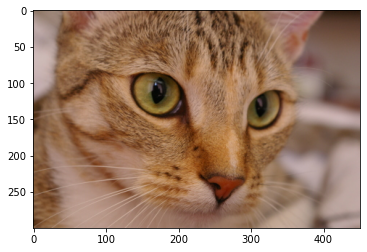

In [77]:
def encoder_image(img, chiffres, lsb, *cle):
    # Tableau de string : va contenir les valeurs de nos bits (rouge,bleu,vert) en binaire
    img_bin = np.chararray((img.shape[0], img.shape[1], img.shape[2]), itemsize=8)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                img_bin[i,j,k] = bin(img[i,j,k])[2:].zfill(8) # car le bin renvoie '0b10001111' il faut enlever les deux premiers caractères
    
    # mettre au bon format le tableau de string
    img_bin = img_bin.decode("utf-8")
    
    # On flatten l'image pour itérer plus facilement
    img_bin_flat = img_bin.flatten()
    img_encoded_bin = img_bin_flat.copy()
    #print("img_bin_flat.shape =",img_bin_flat.shape)
    #print("img_bin=",img_bin.shape)
    #print("mult = ",img_bin.shape[0]*img_bin.shape[1]*img_bin.shape[2])
    #print("longueure message", len(chiffres))
    for i in range(len(chiffres)//lsb):
        img_encoded_bin[i] = img_encoded_bin[i][:8-lsb] + chiffres[0:lsb]
        print("img_encoded_bin[i][:8-lsb]=",img_encoded_bin[i][:8-lsb])
        print("chiffres[0:lsb] =",chiffres[0:lsb])
        print("img_encoded_bin[",i,"]=", img_encoded_bin[i])
        chiffres = chiffres[lsb:] #ici problème probable
        print("chiffres=", len(chiffres))
        print("-------------------------")
   
    img_encoded_bin = np.reshape(img_encoded_bin, img_bin.shape)
    img_encoded = img.copy()
    
    #print("img_encoded_bin =",img_encoded_bin.shape)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                img_encoded[i,j,k] = int(img_encoded_bin[i,j,k],2)
        
    return img_encoded

img_encoded = encoder_image(img, message_bin_flat, 2)
plt.imshow(img_encoded)
plt.show()

In [66]:
img_encoded[5]

array([[156, 133, 125],
       [154, 131, 123],
       [152, 130, 119],
       ...,
       [ 55,  36,  21],
       [ 55,  36,  21],
       [ 56,  34,  20]], dtype=uint8)

In [67]:
img[5]

array([[156, 133, 125],
       [154, 131, 123],
       [152, 130, 119],
       ...,
       [ 55,  36,  21],
       [ 55,  36,  21],
       [ 56,  34,  20]], dtype=uint8)

## Etape 4 : Decoder le message

In [68]:
cle = np.random.randint(2, size=(img.shape[0], img.shape[1]))
cle *= 2

In [69]:
def deviner_lsb(cle):
    modalites = np.unique(cle)
    return modalites[1]

In [70]:
def find_secret_message_bin(image_bin_flat, lsb):
    i = 1
    message_encoded_bin = []
    bits = ""
    motcode = ""
    STOP = ['01010011', '01010100', '01001111', '01010000']
    
    while(True):
        # On récupère les derniers bits de chaque rvb de chaque pixel
        bits += image_bin_flat[i-1][8-lsb:]

        if (len(bits) == 8):
            message_encoded_bin.append(bits)
            
            # A partir de 4 lettres, on peut penser qu'il y a le mot-code STOP
            # On récupère donc ces 4 dernières lettres et on regarde si c'est STOP
            # Si c'est le cas : on arrête la recherche de binaire
            if(len(message_encoded_bin)>=4):
                maximum = len(message_encoded_bin)
                motcode = message_encoded_bin[maximum-4:maximum]
                
                # On enlève les 4 lettres binaires à la fin du message recupérée
                if(motcode == STOP):
                    message_encoded_bin = message_encoded_bin[:maximum-4]
                    break;
            
            bits = ""
            
        i += 1
    
    return message_encoded_bin

def find_secret_message(image_encoded, cle):
    lsb = deviner_lsb(cle)

    # on la met en binaire
    lig, col, couleur =  image_encoded.shape
    image_bin = np.chararray((lig, col, couleur), itemsize=8)

    for i in range(lig):
        for j in range(col):
            for k in range(couleur):
                image_bin[i,j,k] = bin(image_encoded[i,j,k])[2:].zfill(8)

    image_bin = image_bin.decode("utf-8")
    image_bin_flat = image_bin.flatten()
    
    # Méthode pour trouver le message binaire en utilisant le mot-code STOP
    message_encoded_bin = find_secret_message_bin(image_bin_flat, lsb)
    
    # On transforme tout en ASCII
    message_encoded_ascii = [None]*len(message_encoded_bin)

    for i in range(len(message_encoded_bin)):
        message_encoded_ascii[i] = chr(int(message_encoded_bin[i],2))

    return (''.join(message_encoded_ascii))

secret_message = find_secret_message(img_encoded, cle)
print(secret_message)

Thalassius vero ea tempestate praefectus praetorio praesens ipse quoque adrogantis ingenii, considerans incitationem eius ad multorum augeri discrimina, non maturitate vel consiliis mitigabat, ut aliquotiens celsae potestates iras principum molliverunt, sed adversando iurgandoque cum parum congrueret, eum ad rabiem potius evibrabat, Augustum actus eius exaggerando creberrime docens, idque, incertum qua mente, ne lateret adfectans. quibus mox Caesar acrius efferatus, velut contumaciae quoddam vexillum altius erigens, sine respectu salutis alienae vel suae ad vertenda opposita instar rapidi fluminis irrevocabili impetu ferebatur.Postremo ad id indignitatis est ventum, ut cum peregrini ob formidatam haut ita dudum alimentorum inopiam pellerentur ab urbe praecipites, sectatoribus disciplinarum liberalium inpendio paucis sine respiratione ulla extrusis, tenerentur minimarum adseclae veri, quique id simularunt ad tempus, et tria milia saltatricum ne interpellata quidem cum choris totidemque 

## Comparons visuellement les deux images

In [71]:
def histogramme(image, titre, num):
    plt.subplot(1,2,num)
    plt.hist(image.ravel(), bins = range(0,256), color = "gray")
    plt.xlabel('Valeurs')
    plt.ylabel('Nombre de pixels')
    plt.title(titre)

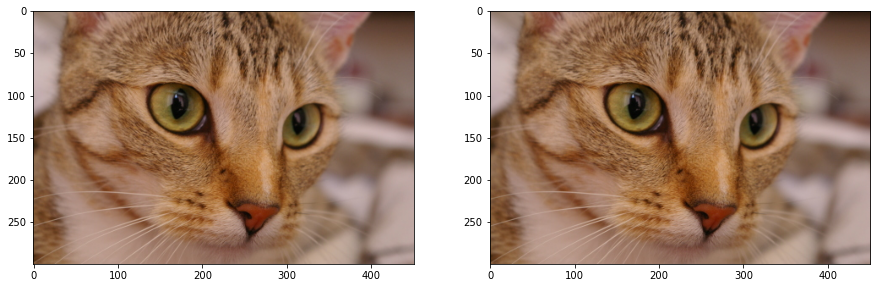

In [72]:
plt.figure(figsize = (15, 15))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(img_encoded)
plt.show()

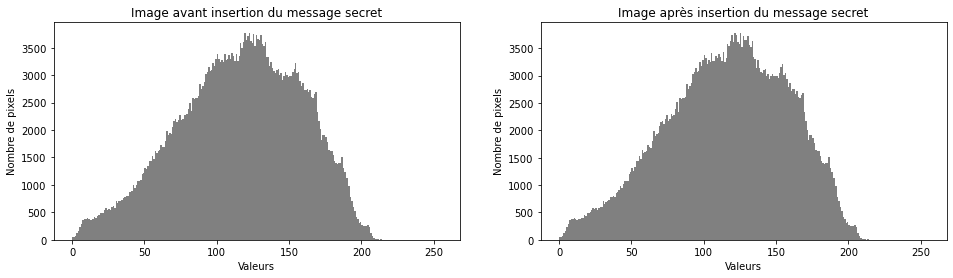

In [73]:
plt.figure(figsize=(16,4))
histogramme(img, "Image avant insertion du message secret", 1)
histogramme(img_encoded, "Image après insertion du message secret", 2)

## Petits tests pour essayer de générer une clé pseudo aléatoire

In [74]:
def generate_cle(coef, img, message):
    nbr_pixels = img.shape[0]*img.shape[1]*img.shape[2]
    longueur = len(message)
    
    random.seed(coef)
    return [int(random.random()*nbr_pixels-1) for _ in range(longueur)]

In [75]:
print(generate_cle(23, img, message))

NameError: name 'random' is not defined

Ici on a pleins de nombres (plus précisement on a le nombre de lettres du message), qui correspondent aux pixels de l'image que nous allons coder. La clé donné sera 23 et la personne pourra lire le message secret.

**Rappel** : 

- Longueur Y : 300
- Longueur X : 451
- Image en couleur donc 3 pixels par pixel

Nombre de pixels total que l'on peut coder : 405900

In [182]:
img.flatten().shape

(405900,)